In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/saved_model/my_modelSP01_AN')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/AN_data/SP01.csv")
time = df['time'].values
AN = df['ammonia nitrogen'].values
df

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

,time,ammonia nitrogen
0,0.000000,0.178364
1,0.002903,0.520712
2,0.005805,0.383773
3,0.008708,0.007189
4,0.011611,0.178364
...,...,...
299,0.986935,0.007189
300,0.989836,0.010613
301,0.993465,0.007189
302,0.996367,0.007189


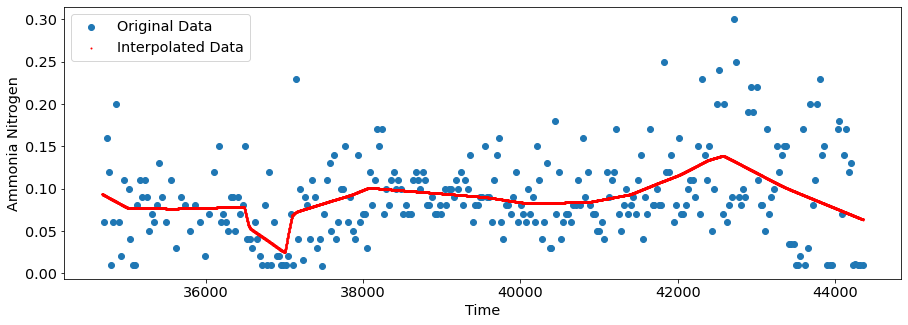

313/313 [==============================] - 0s 391us/step - loss: 2.4187e-16
['loss']


In [2]:
#Transform the normalized scale to real scale
AN_min = 0.0079
AN_max = 0.3
time_min = 34711.00           
time_max = 44357.42            

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(AN_max - AN_min) + AN_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, AN*(AN_max - AN_min) + AN_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Ammonia Nitrogen')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [3]:
interpolation = model.predict([0.027989658
,0.078682038
,0.084798297
,0.091121886
,0.097445476
,0.103769065
,0.110092655
,0.116519909
,0.122636168
,0.128959757
,0.135283347
,0.141606936
,0.147930525
,0.96201491
])
interpolation

array([[0.24160913],
       [0.23455256],
       [0.23444352],
       [0.23433077],
       [0.2345159 ],
       [0.23474649],
       [0.23503035],
       [0.23534277],
       [0.23587406],
       [0.23654374],
       [0.23721343],
       [0.23788333],
       [0.23854709],
       [0.2376329 ]], dtype=float32)